## Black friday dataset EDA and feature engineering
### Cleaning and preparing dataset for model training

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [150]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [151]:
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617579 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     617579 non-null  int64  
 1   Product_ID                  617579 non-null  object 
 2   Gender                      617579 non-null  object 
 3   Age                         617579 non-null  object 
 4   Occupation                  617579 non-null  int64  
 5   City_Category               617579 non-null  object 
 6   Stay_In_Current_City_Years  617578 non-null  object 
 7   Marital_Status              617578 non-null  float64
 8   Product_Category_1          617578 non-null  float64
 9   Product_Category_2          426148 non-null  float64
 10  Product_Category_3          188557 non-null  float64
 11  Purchase                    383979 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 61.3+ MB


In [153]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [154]:
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})
df["Age"] = df["Age"].map({'0-17': 1, '55+':7 , '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
df["City_Category"] = df["City_Category"].map({"A": 0, "B": 1, "C":2})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,0,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,0,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,2,4+,0.0,8.0,NaN,NaN,7969.0


In [155]:
df.drop("City_Category", axis = 1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0.0,8.0,NaN,NaN,7969.0


In [156]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            191431
Product_Category_3            429022
Purchase                      233600
dtype: int64

In [157]:
df["Product_Category_1"] = df['Product_Category_1'].fillna(df.Product_Category_1.mode()[0])
df.Product_Category_1.isnull().sum()

0

In [158]:
df["Product_Category_2"] = df['Product_Category_2'].fillna(df.Product_Category_2.mode()[0])
df.Product_Category_2.isnull().sum()

0

In [159]:
df["Product_Category_3"] = df['Product_Category_3'].fillna(df.Product_Category_3.mode()[0])
df.Product_Category_3.isnull().sum()

0

In [160]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+', "")
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0


In [161]:
Stay_In_Current_City_Years_mode_value = df['Stay_In_Current_City_Years'].mode()[0]
df['Stay_In_Current_City_Years'].fillna(Stay_In_Current_City_Years_mode_value , inplace=True)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617579 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  617579 non-null  object 
 1   Gender                      617579 non-null  int64  
 2   Age                         617579 non-null  int64  
 3   Occupation                  617579 non-null  int64  
 4   Stay_In_Current_City_Years  617579 non-null  int64  
 5   Marital_Status              617578 non-null  float64
 6   Product_Category_1          617579 non-null  float64
 7   Product_Category_2          617579 non-null  float64
 8   Product_Category_3          617579 non-null  float64
 9   Purchase                    383979 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 51.8+ MB


##Visualisation

#### Purchasing power of men > women

<Axes: xlabel='Age', ylabel='Purchase'>

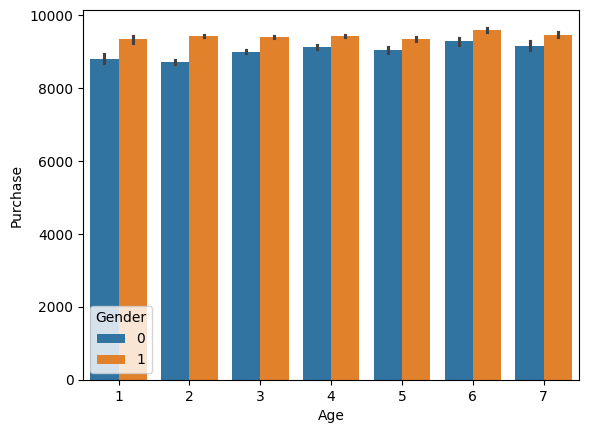

In [162]:
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

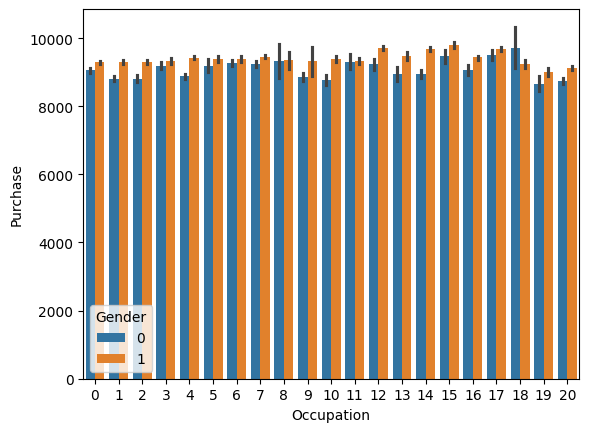

In [163]:
sns.barplot(x="Occupation", y="Purchase", hue="Gender", data=df)

####Purchase of product 1 > product 2 and product 3

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

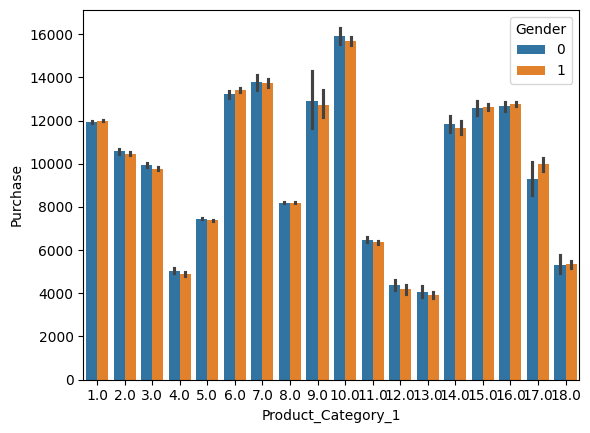

In [164]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

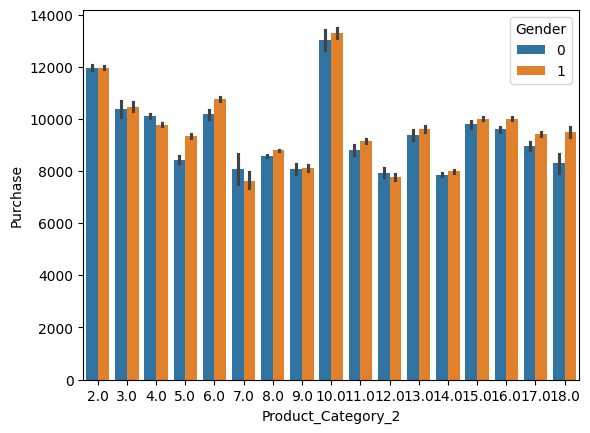

In [165]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

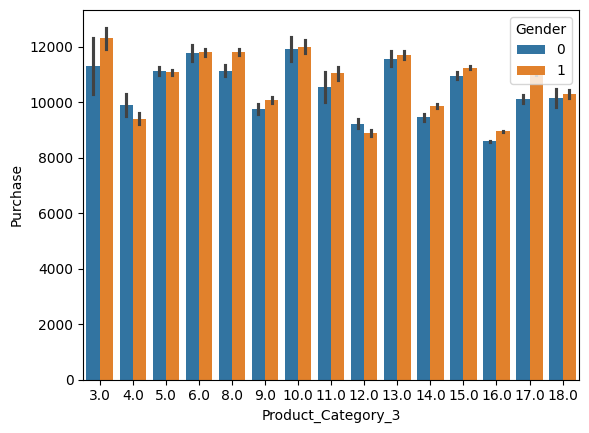

In [166]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)